
=== Erreurs brutes ===
MSE  : 245908.51259413143
RMSE : 495.8916339223031
MAE  : 413.3727397862895
R²   : 0.9901602689774809

=== Erreurs en pourcentage ===
MSE (%)  : 0.0854711298924659
RMSE (%) : 2.9235445933398365
MAE (%)  : 2.4370518794145117


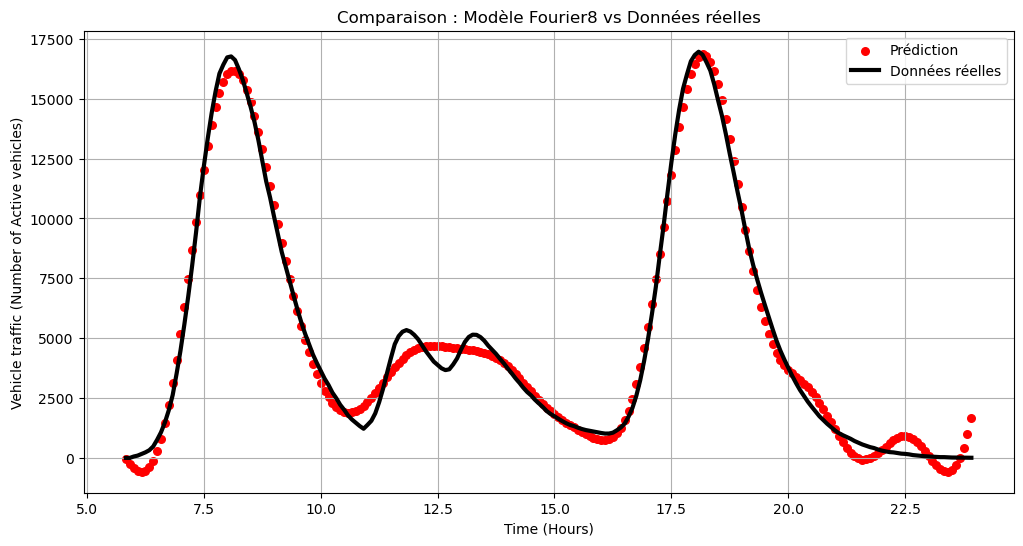

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# 1) Charger les données depuis le fichier Excel
data = pd.read_excel('zzz02.xlsx')

# 2) Définir l'entrée et la sortie
X = data.iloc[:, 0].values.reshape(-1, 1)
y1 = data.iloc[:, 1].values

# === Coefficients du modèle Fourier8 ===
a0 = 5232
a1, b1 = -82.2, 308
a2, b2 = 4234, 1798
a3, b3 = -1463, 3776
a4, b4 = 2050, 718.1
a5, b5 = -1125, 2086
a6, b6 = 196, 93.32
a7, b7 = -269.7, 928
a8, b8 = -586.4, 5.643
w = 0.3648  # fréquence fondamentale

# === Définition de la fonction Fourier8 ===
def f(x):
    return (a0
            + a1 * np.cos(1 * x * w) + b1 * np.sin(1 * x * w)
            + a2 * np.cos(2 * x * w) + b2 * np.sin(2 * x * w)
            + a3 * np.cos(3 * x * w) + b3 * np.sin(3 * x * w)
            + a4 * np.cos(4 * x * w) + b4 * np.sin(4 * x * w)
            + a5 * np.cos(5 * x * w) + b5 * np.sin(5 * x * w)
            + a6 * np.cos(6 * x * w) + b6 * np.sin(6 * x * w)
            + a7 * np.cos(7 * x * w) + b7 * np.sin(7 * x * w)
            + a8 * np.cos(8 * x * w) + b8 * np.sin(8 * x * w))

# Prédiction
y_pred = f(X)

# 3) Évaluation des performances
mse = metrics.mean_squared_error(y1, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y1, y_pred)
r2 = metrics.explained_variance_score(y1, y_pred)

# 4) Conversion en pourcentage (par rapport à la valeur max de y1)
Y_max = np.max(y1)
mse_percent = (mse / (Y_max**2)) * 100
rmse_percent = (rmse / Y_max) * 100
mae_percent = (mae / Y_max) * 100

# 5) Affichage
print("\n=== Erreurs brutes ===")
print("MSE  :", mse)
print("RMSE :", rmse)
print("MAE  :", mae)
print("R²   :", r2)

print("\n=== Erreurs en pourcentage ===")
print("MSE (%)  :", mse_percent)
print("RMSE (%) :", rmse_percent)
print("MAE (%)  :", mae_percent)

# 6) Tracé comparatif
plt.figure(figsize=(12, 6))
plt.scatter(X, y_pred, color="red", label="Prédiction", s=30)
plt.plot(X, y1, color="black", label="Données réelles", linewidth=3)
plt.xlabel("Time (Hours)")
plt.ylabel("Vehicle traffic (Number of Active vehicles)")
plt.title("Comparaison : Modèle Fourier8 vs Données réelles")
plt.grid(True)
plt.legend()
plt.show()

#=== Erreurs brutes ===
#MSE  : 245908.51259413143
#RMSE : 495.8916339223031
#MAE  : 413.3727397862895
#R²   : 0.9901602689774809

#=== Erreurs en pourcentage ===
#MSE (%)  : 0.0854711298924659
#RMSE (%) : 2.9235445933398365
#MAE (%)  : 2.4370518794145117


 
